In [2]:
import matplotlib
#matplotlib.use('Agg')
%matplotlib tk
%autosave 180
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.cm as cm
from matplotlib import gridspec
import parmap
import numpy as np
import pandas as pd
import os
import shutil
import cv2
import scipy.io as sio
import importlib

import glob2

from numba import jit
from sklearn.svm import SVC # "Support vector classifier"
import matplotlib.patches as mpatches


from utility_classification import (plot_median_sem_over_single_trials,
                    sum_pixels_in_registered_mask,
                    make_movie,
                    make_training_sets_multiple_tests_window,
                    make_training_sets_multiple_tests,
                    make_training_sets,
                    make_training_sets_multi_times,
                    make_training_sets_multi_times_multi_areas,
                    parallel_svm_multiple_tests,
                    parallel_svm_multi_time,
                    parallel_svm_multi_time_multi_area,
                    plot_true_vs_random,
                    fix_trials,
                                    plot_accuracy
                     )

colors = [
'blue','red','green','cyan',    
'orange','firebrick','lawngreen','dodgerblue','crimson','orchid','slateblue',
'black','grey','brown','slategrey','darkviolet','darkmagenta',
'darkgreen','darkorange','indianred','darkviolet','deepskyblue','greenyellow',
'peru','cadetblue','forestgreen','slategrey','lightsteelblue','rebeccapurple',
'darkmagenta','yellow','hotpink']



Autosaving every 180 seconds


In [3]:
###############################################################
################ LOAD SINGLE TRIAL DATA #######################
###############################################################

#fname = '/media/cat/4TBSSD/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_10.0sec_butterworth_globalAverage_0.1hz_6.0hz_04code_singletrials.npy'
fname = '/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/data_04_code_62trials_.npy'
#fname = '/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz_10.0sec_butterworth_globalAverage_0.1hz_6.0hz_04code_singletrials.npy'
#fname = '/media/cat/4TBSSD/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_3.0sec_butterworth_globalAverage_0.1hz_6.0hz_04code_singletrials.npy'
#data_singles = np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_10.0sec_butterworth_globalAverage_0.1hz_6.0hz_04code_singletrials.npy')
data_singles = np.load(fname)
print ("loaded data for single trials: ", data_singles.shape)

root_dir = os.path.split(fname)[0]+'/'
try:
    os.mkdir(root_dir+'/analysis/')
except:
    pass


loaded data for single trials:  (62, 601, 128, 128)


In [4]:
###############################################################
################ LOAD RANDOM TRIAL DATA #######################
###############################################################
#data_random = np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_10.0sec_butterworth_globalAverage_0.1hz_6.0hz_randomcode_singletrials.npy')
data_random = np.load(fname.replace('04','random'))

print ("Random data loaded: ", data_random.shape)


Random data loaded:  (62, 601, 128, 128)


In [6]:



# load the atlas labels
#allen_ids = np.load('/home/cat/id.npy')
#allen_abbreviations = np.loadtxt('/home/cat/abbreviations.txt', dtype='str')

# load Allen Institute afine transformation to scale data
maskwarp= np.load('/media/cat/4TBSSD/yuki/IA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_aligned_maskwarp.npy')
print (maskwarp.shape)


(128, 128)


### SINGLE AREA ANALYSES

In [7]:
###############################################################
################ MASK DATA TO A SINGLE AREA ###################
###############################################################
area_masks = np.load('/home/cat/areas.npy',allow_pickle=True)
print ("# of areas saved: ", area_masks.shape)
#print (" areas 0: ", area_masks[0])
#names = [['"Primary', 'motor', 'area,', 'Layer', '2/3"'], ['"Secondary', 'motor', 'area,', 'layer', '2/3"'], ['"Retrosplenial', 'area,', 'lateral', 'agranular', 'part,', 'layer', '2/3"'], ['"Retrosplenial', 'area,', 'dorsal', 'part,', 'layer', '2/3"'], ['"Retrosplenial', 'area,', 'ventral', 'part,', 'layer', '2/3"']]
#[['"Primary', 'motor', 'area,', 'Layer', '2/3"'], ['"Secondary', 'motor', 'area,', 'layer', '2/3"'], ['"Retrosplenial', 'area,', 'dorsal', 'part,', 'layer', '2/3"'], ['"Retrosplenial', 'area,', 'ventral', 'part,', 'layer', '2/3"']]
names = np.load('/home/cat/area_names.npy',allow_pickle=True)
print ("all areas: ", names)
print (data_singles.shape)

selected_area = [1]
print ("area selected: ", names[selected_area])

prefix = ''
try:
    for k in range(len(names[selected_area])):
        #print (names[selected_area][k].replace('"',''))
        prefix=prefix+"_"+names[selected_area][k].replace('"','')
    prefix = (prefix[1:]).replace(",","").replace('"',"").replace("/","")+"_"
except:
    prefix = 'all_core_'
print (prefix)

# of areas saved:  (10, 128, 128)
all areas:  [list(['"Primary', 'motor', 'area,', 'Layer', '2/3"'])
 list(['"Secondary', 'motor', 'area,', 'layer', '2/3"'])
 list(['"Primary', 'somatosensory', 'area,', 'lower', 'limb,', 'layer', '2/3"'])
 list(['"Primary', 'somatosensory', 'area,', 'upper', 'limb,', 'layer', '2/3"'])
 list(['"Primary', 'visual', 'area,', 'layer', '2/3"'])
 list(['"Retrosplenial', 'area,', 'lateral', 'agranular', 'part,', 'layer', '2/3"'])
 list(['"Retrosplenial', 'area,', 'dorsal', 'part,', 'layer', '2/3"'])
 list(['"Retrosplenial', 'area,', 'ventral', 'part,', 'layer', '2/3"'])
 list(['"Anterior', 'area,', 'layer', '2/3"'])
 list(['"Rostrolateral', 'area,', 'layer', '2/3"'])]
(62, 601, 128, 128)
area selected:  [list(['"Secondary', 'motor', 'area,', 'layer', '2/3"'])]
all_core_


In [10]:
###############################################################
################ MASK DATA TO A SINGLE AREA ###################
###############################################################
# maske real data

if True: # single areas:
    area_mask_selected = area_masks[selected_area]+1
    print ("area mask selected: ", area_mask_selected)
    print ("area mask selected: ", area_mask_selected.shape)
if False:
    #area_mask_selected = np.zeros((128,128),'float32')
    #print ("Area mask: ", area_mask_selected.shape)
    print ("selected areas: ", selected_area)
    area_masks_temp = area_masks
    area_masks_temp+=1
    #print (np.dstack(area_masks[selected_area]).shape)
    area_mask_selected = area_masks_temp[selected_area[0]]
    for s in selected_area[1:]:
        print (s)
        area_mask_selected = np.nansum(np.dstack((area_mask_selected, area_masks_temp[s])),2)
    
    #plt.imshow(area_masks[0])
    #area_mask_selected = np.nansum(np.dstack((area_masks[4],area_masks[5],area_masks[6])),2)
    #area_mask_selected = np.nansum(np.dstack((area_masks[2],area_masks[3])),2)
    print (area_mask_selected.shape)

plt.imshow(area_mask_selected)
    

# # mask areas not involved
# data_singles_masked = data_singles.copy()
# data_random_masked = data_random.copy()
# for k in range(data_singles.shape[0]):
#     if k %10==0:
#         print ("trial", k)
#     for p in range(data_singles.shape[1]):
#         data_singles_masked[k,p]=data_singles[k,p]*area_mask_selected
#     #print (data_singles[k,p][mask_single_area].shape)
        
# for k in range(data_random.shape[0]):
#     if k %10==0:
#         print ("trial", k)
#     for p in range(data_random.shape[1]):
#         data_random_masked[k,p]=data_random[k,p]*area_mask_selected

area mask selected:  [[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
area mask selected:  (1, 128, 128)


TypeError: Invalid shape (1, 128, 128) for image data

In [7]:
###############################################################
################ SUM PIXELS IN SINGLE AREA ####################
###############################################################
def sum_pixels_in_single_area(data):

    data_out = data.copy()
    print (" # of trials: ", data.shape[0])
    
    #print ("mask_single_area: ", mask_single_area.shape, mask_single_area)
    
    trial_courses = []
    for k in range(data.shape[0]):
        if k%10==0:
            print ("computing trial: ", k)
        time_courses_local = []

        # convert to 1D vector to mask faster
        trial_courses.append([])
        for p in range(data.shape[1]):
            trial_courses[k].append(
                            data[k,p].sum()
                            )
            print (data[k,p])
            print ("res: ", data[k,p][mask_single_area].shape)
            print ("data out: ", data.shape, data[k,p].shape)
            print (k,p)
            break
#         idx = np.where()[0]

#             # only keep areas that have at least 10 pixels
#             if idx.shape[0]>10:
#                 #print ("Area: ", id_)
#                 area_ids.append(id_)#print ("Areas: ", id_)
#                 #print (data1D[:,idx].shape)

#                 temp = data1D[:,idx]

#                 if False:
#                     # compute DFF
#                     F0 = np.nanmean(temp,axis=0)
#                     dFF = (data1D[:,idx]-F0)/F0
#                 else:
#                     # skip dFF computation;
#                     dFF = temp
                
#                 # save average of all pixesl post DFF
#                 time_courses_local.append(np.nanmean(dFF, axis=1))

#             #all_times.append(time_courses_local)
#         trial_courses.append(time_courses_local)

    trial_courses = np.float32(trial_courses)
    print ("# trials, # areas, # times: ", trial_courses.shape)
    print ("area ids: ", area_ids.shape)

    return area_ids, trial_courses

print ("starting data shape [# trials, # time points, width, height]: ", data_singles_masked.shape)
# accumulate mean activity in each ROI
# input data shape: [# trials, # times, width, height]
trial_courses = np.nansum(np.nansum(data_singles_masked,3),2)[:, None]
print ("trial coruses single area: ", trial_courses.shape)

#trial_courses = sum_pixels_in_single_area(data_singles)
trial_courses_random = np.nansum(np.nansum(data_random_masked,3),2)[:, None] #data_random.sum(3).sum(2)[:,None]
#trial_courses_random = sum_pixels_in_single_area(data_random)
#print (" randomized trial time courses: ", trial_courses_random.shape)

print ("trial courses singel area random: ", trial_courses_random.shape)


starting data shape [# trials, # time points, width, height]:  (63, 601, 128, 128)
trial coruses single area:  (63, 1, 601)
trial courses singel area random:  (51, 1, 601)


### MULTI AREA ANALYSIS

In [18]:
###############################################################
################ SUM PIXELS IN MULTIPOLE AREAS AREA ####################
###############################################################
if True:    
    
    prefix="all_areas_"
    # accumulate mean activity in each ROI
    # input data shape: [# trials, # times, width, height]
    area_ids, trial_courses = sum_pixels_in_registered_mask(data_singles, maskwarp)

    # compute random trial time courses
    _, trial_courses_random = sum_pixels_in_registered_mask(data_random, maskwarp)
    print (" randomized trial time courses: ", trial_courses_random.shape)
    print (trial_courses_random.shape)
    
    np.save(fname[:-4]+'_area_ids.npy', area_ids)
    np.save(fname[:-4]+'_trial_courses.npy', trial_courses)
    np.save(fname[:-4]+'_trial_courses_random.npy', trial_courses_random)
    
    
    

 # of trials:  62
 # of areas:  (253,)
computing trial:  0
computing trial:  10
computing trial:  20
computing trial:  30
computing trial:  40
computing trial:  50
computing trial:  60
# trials, # areas, # times:  (62, 35, 601)
area ids:  (35,)
 # of trials:  62
 # of areas:  (253,)
computing trial:  0
computing trial:  10
computing trial:  20
computing trial:  30
computing trial:  40
computing trial:  50
computing trial:  60
# trials, # areas, # times:  (62, 35, 601)
area ids:  (35,)
 randomized trial time courses:  (62, 35, 601)
(62, 35, 601)


In [7]:
print (np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz_10.0sec_butterworth_globalAverage_0.1hz_6.0hz_04code_singletrials_area_ids.npy'))

[  0   8  15  16  17  21  29  36  43  50  57  64  71  78 100 114 129 136
 143 150 157 164 171 178 186 198 249 255 261 268 275 282 300 301 653]


### REMOVE INFINITES FROM MULTI- or SINGLE AREA DATA

In [19]:
#####################################################################
######## REMOVE INFINITIES, NANS ETC FROM DATA ######################
#####################################################################
trial_courses_fixed, trial_courses_random_fixed = fix_trials(trial_courses, trial_courses_random)
print ("trial_courses_fixed: ", trial_courses_fixed.shape)
print ('trial_courses_random_fixed: ', trial_courses_random_fixed.shape)
print("DONE")
#plt.show()


trial_courses_fixed:  (62, 35, 601)
trial_courses_random_fixed:  (62, 35, 601)
DONE


In [20]:
#####################################################################
######## SAVE ROI BASED DATA ######################
#####################################################################
np.save('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/data_04_code_62trials_ROIs.npy' , trial_courses_fixed)
np.save('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/data_random_code_62trials_ROIs.npy' , trial_courses_random_fixed)


In [11]:
# #print (trial_courses[0])
# ax=plt.subplot(1,2,1)
# plt.plot(trial_courses[:10].squeeze().T)
# ax=plt.subplot(1,2,2)
# plt.plot(trial_courses_random_fixed[:10].squeeze().T)
# plt.show()

In [26]:
# generate 80% - 20% training - testing datasets
def generate_training_data(trial_courses_fixed, trial_courses_random_fixed):
    selected_trials = np.arange(int(trial_courses_fixed.shape[0]*0.8)) # of trials to separate the train vs test data
    selected_trials_random = np.arange(int(trial_courses_random_fixed.shape[0]*0.8)) # of trials to separate the train vs test data

    trial_courses_fixed_ids = []
    trial_courses_random_fixed_ids = []
    ctr=0
    while True:
        trial_courses_fixed_ids.append(selected_trials+ctr)
        trial_courses_random_fixed_ids.append(selected_trials_random+ctr)

        ctr+=1
        if (ctr+selected_trials.shape[0]>=trial_courses_fixed.shape[0]):
            break
        if (ctr+selected_trials_random.shape[0]>=trial_courses_random_fixed.shape[0]):
            break

    return trial_courses_fixed_ids, trial_courses_random_fixed_ids

def normalize_data(data1, data2, random_flag):
    
    #print ("NIORMALIZEION: ", data1.shape, data2.shape)
    data_in = np.vstack((data1,data2))    
    #print ("Data in: ", data_in.shape)
    
    if random_flag:
        idx_random = np.random.choice(np.arange(data_in.shape[0]), size=data_in.shape[0], replace=False)
        #print (idx_random.shape)
        data_in = data_in[idx_random]
        #print ("Data in: ", data_in.shape)

    
    #data_in shaep: (63, 35, 181)
    for k in range(data_in.shape[1]):
        for p in range(data_in.shape[2]):
            temp = data_in[:,k,p]
            #print ("temp re: ", temp)
            temp = (temp-temp.mean(0))/(temp.std(0)+0.00000001) # to avoid nans
            #print ("temp post: ", temp)
            data_in[:,k,p] = temp
    
    data1 = data_in[:data1.shape[0]]
    data2 = data_in[data1.shape[0]:]   
    #print ("POST NIORMALIZEION: ", data1.shape, data2.shape)

    return data1, data2


def make_training_sets_multiple_tests_window2(time, 
                                             time_window,
                                             trial_courses_fixed, 
                                             trial_courses_fixed_ids,
                                             trial_courses_random_fixed, 
                                             trial_courses_random_ids):
    
    # combine good trials with random trials for training sets:
    #time = 0
    #print ("trial_courses_fixed: ", trial_courses_fixed.shape)
    good_trials = trial_courses_fixed[trial_courses_fixed_ids, :,time:time+time_window].reshape(trial_courses_fixed_ids.shape[0], -1)
    #print ("good trials: ", good_trials.shape)
    temp = np.arange(trial_courses_fixed.shape[0])
    idx = np.delete(temp,trial_courses_fixed_ids) # remove the training set trials for testing stage
    test_trials = trial_courses_fixed[idx, :,time:time+time_window].reshape(idx.shape[0], -1)  # select left over trials for testing;
    #print ("good test_trials: ", test_trials.shape)
    
    random_trials = trial_courses_random_fixed[trial_courses_random_ids, :,time:time+time_window].reshape(trial_courses_random_ids.shape[0], -1)
    #print ("random_trials: ", random_trials.shape)
    temp = np.arange(trial_courses_random_fixed.shape[0])
    idx = np.delete(temp,trial_courses_random_ids) # remove training set trials for testing
    test_trials_random = trial_courses_random_fixed[idx, :,time:time+time_window].reshape(idx.shape[0], -1)
    #print ("test_trials_random: ", test_trials_random.shape)
    #print ("test_trials_random: ", test_trials_random.shape)

    # rebalance the data to ensure SVM doesn't overfit; 
    # Cat TODO: this is a big issue in cases where insufficient postiive of negative trials are presnt:
    max_n_trials = min(good_trials.shape[0], random_trials.shape[0])
    good_trials = good_trials[:max_n_trials]
    random_trials = random_trials[:max_n_trials]

    # 
    max_n_trials = min(test_trials.shape[0], test_trials_random.shape[0])
    test_trials = test_trials[:max_n_trials]
    test_trials_random = test_trials_random[:max_n_trials]
    
    
    # make labels
    #y = np.zeros(good_trials.shape[0]+random_trials.shape[0],'int32')
    #y[:good_trials.shape[0]]=1
    y = np.zeros(good_trials.shape[0]+random_trials.shape[0],'int32')
    y[:good_trials.shape[0]]=1

    # concatenate
    X = np.vstack((good_trials,random_trials))

    #rint ("done time: ", time)
    
    
    return X, y, test_trials, test_trials_random



def parallel_svm_multiple_tests2(time, 
                                time_window,
                                trial_courses_fixed, 
                                trial_courses_fixed_ids,
                                trial_courses_random_fixed, 
                                trial_courses_random_ids,
                                random_flag,
                                root_dir):


    # 
    if time%100==0:
        print ("processing time: ", time)
        
    #print ("normalizing data... (TO CHECK THIS STEP)")
    trial_courses_fixed, trial_courses_random_fixed = \
                normalize_data(trial_courses_fixed, trial_courses_random_fixed, random_flag)
    
    #print ("trial_courses_fixed_ids: ", trial_courses_fixed_ids)
    res1 = []
    res2 = []
    sens = []
    spec = []
    accuracy = []
    for k in range(len(trial_courses_fixed_ids)):
        X, y, test_trials, test_trials_random = make_training_sets_multiple_tests_window2(time, 
                                                                                         time_window,
                                                                                         trial_courses_fixed, 
                                                                                         trial_courses_fixed_ids[k],
                                                                                         trial_courses_random_fixed, 
                                                                                         trial_courses_random_ids[k])
        #print ("test trials: ", test_trials.shape)
        #print ("X: ", X.shape)
        #print ("y: ", y.shape)
        #plotting=False
        model = SVC(kernel='linear', C=1)
        model.fit(X, y)
        #plot_decision_regions(X, y, clf=model, legend=2)

        support_vectors = model.support_vectors_        
        #print ("support_vectors: ", support_vectors)
        
        #plt.scatter(support_vectors, support_vectors*0 + 2, color='green')
        
        #print ("X: ", X)
        #print ("y: ", y)
        #plt.scatter(X, X*0-0.5, c=y)
        # test real data
        #print ("test trials : ", test_trials)
        #plt.scatter(test_trials, test_trials*0+0.25,c='blue',label='test trials')

        yfit = model.predict(test_trials)
        true_pos = np.sum(yfit)
        false_neg = (test_trials.shape[0]-true_pos)
        #print ("True pos: ", true_pos, " false neg: ", false_neg)
        res1.append(np.sum(yfit)/float(yfit.shape[0]))

        # test random data
        #print ("test trials random: ", test_trials_random)
        #plt.scatter(test_trials_random, test_trials_random*0+0.5,c='red', label='random_trials')

        yfit = model.predict(test_trials_random)
        false_pos = np.sum(yfit)
        true_neg = (test_trials_random.shape[0]-false_pos)
        #print ("True negative: ", true_neg, " false_pos: ", false_pos)
        res2.append(np.sum(yfit)/float(yfit.shape[0]))
    
        # compute sensitivity:  true positives / (true positives + false negatives)
        sens.append(true_pos / (true_pos+false_neg))
        spec.append(true_neg / (true_neg+false_pos))
        
        all_pos = true_pos + false_neg
        all_neg = false_pos + true_neg
        # compute accuracy
        accuracy_temp = (true_pos+true_neg)/(all_pos+all_neg)
        
        if False:
            print ("")
            print ("SVM run: ", k)
            print ("true_pos :", true_pos)
            print ("true_neg :", true_neg)
            print ("false_neg :", false_neg)
            print ("false_pos :", false_pos)
            print ("all_pos :", all_pos)
            print ("all_neg :", all_neg)
            print ("accuracy :", accuracy_temp)

        # compute accuracy:
        accuracy.append(accuracy_temp)
    
    #return (res1, res2, sens, spec)
    np.save(root_dir + str(time)+'_sens.npy', sens)
    np.save(root_dir + str(time)+'_spec.npy', spec)
    np.save(root_dir + str(time)+'_accuracy.npy', accuracy)
    
    return (res1, res2)
# 
def plot_accuracy2(root_dir, length_rec, 
                   fig, ax,
                   clr, label_in, labels):
    time_window=1
    #fig=plt.figure()
    #ax=plt.subplot(111)
    sample_rate = 30
    window_size = length_rec//sample_rate/2
    spec_array = []
    spec_error = []
    sens_array = []
    sens_error = []
    accuracy_array = []
    accuracy_error = []

    for k in range(length_rec):
        #print (k)
        sens = np.load(root_dir+str(k)+"_sens.npy")
        spec = np.load(root_dir+str(k)+"_spec.npy")
        acc = np.load(root_dir+str(k)+"_accuracy.npy")
        #print (sens, spec)

        # plot real pulls time-series
        sens_array.append(sens.mean(0))
        sens_error.append(sens.std(0))

        # plot randomized prediction time-series
        spec_array.append(spec.mean(0))
        spec_error.append(spec.std(0))

        # plot randomized prediction time-series
        accuracy_array.append(acc.mean(0))
        accuracy_error.append(acc.std(0))

    t = np.arange(len(sens_array))/30.-(length_rec//sample_rate/2)
    # plt.errorbar(t, 
    #              sens_array, sens_error, linestyle='None', marker='^', c='blue', alpha=.7)
    # plt.plot(t, sens_array, c='blue', alpha=.7)

    # plt.errorbar(t, 
    #              spec_array, spec_error, linestyle='None', marker='^', c='red', alpha=.7)
    # plt.plot(t, spec_array, c='red', alpha=.7)

    if False:
        plt.errorbar(t, 
                 accuracy_array, accuracy_error, linestyle='None', marker='^', c=clr, alpha=.7)
    
    if False:
        from scipy.signal import savgol_filter
    
        yhat = savgol_filter(accuracy_array, 3, 1) #
        plt.plot(t, yhat, c=clr,linewidth=5, alpha=.7)
    else:
        plt.plot(t, accuracy_array, c=clr,linewidth=5, alpha=.7)



    #labels = []
    patch_j = mpatches.Patch(color = clr, label = label_in[:-1])
    labels.append(patch_j)
#     patch_j = mpatches.Patch(color = 'red', label = "Motor")
#     labels.append(patch_j)
#     patch_j = mpatches.Patch(color = 'black', label = "All Cortex")
#     labels.append(patch_j)

    plt.ylim(0,1)
    plt.xlim(t[0],t[-1])
    #plt.legend(handles=labels)
    plt.ylim(0,1)
    plt.plot([t[0],t[-1]],[0.5,0.5],'r--',c='black')
    plt.plot([0,0],[0,1],'r--',c='black')
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)

    plt.suptitle("Sliding time window prediction using "+str(time_window)+" frames = "+str(round(time_window/30.,2))+"sec", fontsize=20)
    plt.xlabel("Time (sec)",fontsize=20)
    plt.suptitle(root_dir, fontsize=20)
    #plt.show()
    return labels, ax

In [21]:
# ################# TRAIN SVM CLASSIFIER OVER THE DATA #################
# make batches of data to train and test over
# ratio of testing 80% train to 20% test is fixed inside function
trial_courses_fixed_ids, trial_courses_random_fixed_ids = \
            generate_training_data(trial_courses_fixed, trial_courses_random_fixed)

# print szies of datasets
#print ("trial courses fixed ids: ", len(trial_courses_fixed_ids))
#print ("trial_courses_random_fixed_ids: ", len(trial_courses_random_fixed_ids))

# start 
random_flag = False  # shuffle data to show baseline
#prefix='secondary_motor'
#if random_flag:
#    prefix = "random_"
    
time_window = 1

from mlxtend.plotting import plot_decision_regions

# Plotting decision regions


#times = np.arange(0,trial_courses_fixed.shape[2]-time_window)
times = np.arange(0,trial_courses_fixed.shape[2])
if True:
    res = parmap.map(parallel_svm_multiple_tests2, 
                     times, 
                     time_window,
                     trial_courses_fixed, 
                     trial_courses_fixed_ids, # ids of trial sto be used; make sure 
                     trial_courses_random_fixed, 
                     trial_courses_random_fixed_ids,
                     random_flag,
                     root_dir+'/analysis/'+prefix,
                     pm_processes=4)
else:
    res = []
    
    for k in range(len(times)):
    #for k in [0]:
        res.append(parallel_svm_multiple_tests2(times[k], 
                                     time_window,
                     trial_courses_fixed, 
                     trial_courses_fixed_ids, # ids of trial sto be used; make sure 
                     trial_courses_random_fixed, 
                     trial_courses_random_fixed_ids,
                     random_flag,
                     root_dir+'/analysis/'+prefix))
        #break
    
res = np.vstack(res)
print ("DONE")

processing time: 0 
processing time:  100
processing time:  200
processing time:  300
processing time:  400
processing time:  500
processing time:  600
DONE


In [27]:
###############################################################
########## PLOT ACCURACY AFTER SAVING DATA ####################
###############################################################
names = np.load('/home/cat/area_names.npy',allow_pickle=True)

fig = plt.figure()
ax=plt.subplot(111)
ctr=0
label_in = prefix = 'all_areas_'
labels=[]
clrs=['black','blue']
labels, ax = plot_accuracy2(root_dir+'/analysis/'+prefix, 
                            trial_courses_fixed.shape[2]-1, 
                            fig, ax, clrs[ctr], label_in, labels)
    

In [27]:
###############################################################
########## PLOT ACCURACY AFTER SAVING DATA ####################
###############################################################
names = np.load('/home/cat/area_names.npy',allow_pickle=True)

clrs = ['black','red','blue','yellow','pink','green']
labels = []
fig=plt.figure()
ax=plt.subplot(111)

ctr=0
# plot all data:
label_in = prefix = 'all_areas_'
#label_in = names[selected_area]
labels, ax = plot_accuracy2(root_dir+'/analysis/'+prefix, trial_courses_fixed.shape[2]-1, 
                            fig, ax, clrs[ctr], label_in, labels)

# PLOT MULTIPLE AREAS
clrs=['green','blue']
names_prefix = ['all_limb_','Primary_visual_area_layer_23_']
#names_prefix = ['all_motor_','all_rs_','Primary_visual_area_layer_23_']
#names_prefix = ['Primary_visual_area_layer_23_']
#names_prefix = ['Anterior_area_layer_23_']
#names_prefix = ['Rostrolateral_area_layer_23_']


# PLOT INDIVIDUAL ACCURACY TRACES
ctr=0
for prefix in names_prefix:
    print ('prefix: ', prefix)
    label_in = prefix
    labels, ax = plot_accuracy2(root_dir+'/analysis/'+prefix, trial_courses_fixed.shape[2]-1, 
                            fig, ax, clrs[ctr], label_in, labels)
    ctr+=1
    
# plot cumulative RS plot
# selected_areas = [4]
# prefix="all_rs_"

# label_in = prefix #names[selected_area]
# labels, ax = plot_accuracy2(root_dir+'/analysis/'+prefix, trial_courses_fixed.shape[2]-1, 
#                             fig, ax, 'green', label_in, labels)
# ctr+=1
    
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.axhspan(0.4, 0.6, alpha=0.1, color='black')
ax.legend(handles=labels, fontsize=20)
#plt.ylim(0.3,1.0)
plt.show()

prefix:  all_limb_
prefix:  Primary_visual_area_layer_23_


In [12]:
# plot classification rates
time_window=1
plot_true_vs_random(res, trial_courses_fixed, time_window)


[[0.53846154 0.46153846 0.46153846 ... 0.38461538 0.30769231 0.38461538]
 [0.53846154 0.46153846 0.46153846 ... 0.30769231 0.30769231 0.38461538]
 [0.53846154 0.46153846 0.61538462 ... 0.30769231 0.23076923 0.30769231]
 ...
 [0.53846154 0.38461538 0.53846154 ... 0.61538462 0.38461538 0.46153846]
 [0.53846154 0.46153846 0.69230769 ... 0.61538462 0.46153846 0.38461538]
 [0.69230769 0.46153846 0.61538462 ... 0.76923077 0.30769231 0.30769231]]


In [17]:
# plot precision and recall
# plot_specificity_sensitivity(res, trial_courses_fixed)


In [13]:
# SVM - all areas at once; + time window
times1 = np.arange(0,151,1)
times2 = np.arange(30,181,1)
times = np.vstack((times1,times2)).T
#print (times)
res = parmap.map(parallel_svm_multi_time, times, trial_courses_fixed, 
                 trial_courses_random_fixed,
                 pm_processes=4)

#print (times)
# parallel_svm_multi_time(times[0], trial_courses_fixed, 
#                         trial_courses_random_fixed)

res = np.vstack(res)

times  [ 0 30]
times  times [10 40] 
[30 60]
times  [40 70]
times  [50 80]
times times   [20 50][60 90]

times  [ 70 100]
times  times  [ 80 110]times  
[ 90 120]
[100 130]
times times  [120 150]
 times [110 140][130 160] times 

 [140 170]
times  [150 180]


NameError: name 'real_data' is not defined

In [22]:
# SVM time window; area specific

times1 = np.arange(0,151,1)
times2 = np.arange(30,181,1)
times = np.vstack((times1,times2)).T

areas = np.arange(35)
#print (times)
res = parmap.map(parallel_svm_multi_time_multi_area, 
                 times, 
                 areas,
                 trial_courses_fixed, 
                 trial_courses_random_fixed,
                 pm_processes=4)

#print (times)
# parallel_svm_multi_time(times[0], trial_courses_fixed, 
#                         trial_courses_random_fixed)

res = np.array(res)



times  [ 0 30]
times  [10 40]
times  [20 50]
times  [30 60]
done times:  [ 0 30]
times  [ 1 31]
done times:  [10 40]
times  [11 41]
done times:  [20 50]
times  [21 51]
done times:  [30 60]
times  [31 61]
done times:  [ 1 31]
times  [ 2 32]
done times:  [11 41]
times  [12 42]
done times:  [21 51]
times  [22 52]
done times:  [31 61]
times  [32 62]
done times:  [ 2 32]
times  [ 3 33]
done times:  [12 42]
times  [13 43]
done times:  [22 52]
times  [23 53]
done times:  [32 62]
times  [33 63]
done times:  [ 3 33]
times  [ 4 34]
done times:  [13 43]
times  [14 44]
done times:  [23 53]
times  [24 54]
done times:  [33 63]
times  [34 64]
done times:  [ 4 34]
times  [ 5 35]
done times:  [14 44]
times  [15 45]
done times:  [24 54]
times  [25 55]
done times:  [34 64]
times  [35 65]
done times:  [ 5 35]
times  [ 6 36]
done times:  [15 45]
times  [16 46]
done times:  [25 55]
times  [26 56]
done times:  [35 65]
times  [36 66]
done times:  [ 6 36]
times  [ 7 37]
done times:  [16 46]
done times:  [26 56

In [21]:
# PLOTS FOR SINGLE AREA / CUMULATIVE AREAS
t = np.arange(res.shape[0])/30-3
plt.plot(t,res[:,0],c='blue')
plt.plot(t,res[:,1],c='red')
plt.title("Decoding rewarded trials (blue); random trials (red)"+
         "\nUsing single 1sec of data (30 frames @30Hz) bins",fontsize=20)
plt.plot([-3,3],[0.5,0.5],'r--',c='black')
plt.plot([0,0],[0,1],'r--',c='black')
plt.xlabel("Time (sec)",fontsize=20)
plt.ylabel("Probability (dash=chance)",fontsize=20)

plt.show()


In [67]:
# PLOTS PER AREA

t = np.arange(res.shape[0])/30-3
for k in range(35):
    ax=plt.subplot(5,7,k+1)
# plt.plot(t,real_data,c='blue')
    # plt.plot(t,random_data,c='red')
    
    plt.plot(t,res[:,0,k],c='blue')
    plt.plot(t,res[:,1,k],c='red')
    plt.plot([-3,3],[0.5,0.5],'r--',c='black')
    plt.plot([0,0],[0,1],'r--',c='black')
    if k<34:
        plt.xticks([])
    plt.title("Area: "+str(k))
    
plt.suptitle("Decoding rewarded trials (blue); random trials (red)"+
             "\nUsing single 1sec of data (30 frames @30Hz) bins",fontsize=20)
#plt.xlabel("Time (sec)",fontsize=20)
#plt.ylabel("Probability (dash=chance)",fontsize=20)

plt.show()

In [28]:
#test_trials_rewarded = trial_courses_fixed[50:, :,time].reshape(50, -1)
#model = grid.best_estimator_
yfit = model.predict(test_trials)
print ("real result: ", np.sum(yfit)/float(yfit.shape[0]))

yfit = model.predict(test_trials_random)
print ("random result: ", np.sum(yfit)/float(yfit.shape[0]))




real result:  0.6923076923076923
random result:  0.34


(63, 720)


In [21]:
abstimes = np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_abstimes.npy')
abspositions = np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_abspositions.npy')
abscodes = np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_abscodes.npy')

print (abstimes.shape, abstimes)
print (abspositions.shape, abspositions)
print (abscodes.shape, abscodes)



(156815,) [0.00000000e+00 0.00000000e+00 8.33333333e-03 ... 1.30421401e+03
 1.30422234e+03 1.30423067e+03]
(156815,) [0. 0. 0. ... 0. 0. 0.]
(156815,) [b'0' b'0' b'0' ... b'0' b'0' b'0']


In [22]:
likelihoods = lever[:,2]
# idx = np.where(np.logical_and(likelihoods>0.8, likelihoods<=1.0))[0]
# likelihoods[...]= 0
# likelihoods[idx]=1
print (likelihoods.shape)
# plt.plot(likelihoods)
# plt.show()

idx = np.where(likelihoods<0.8)[0]
lever[idx,0]=np.median(lever[:,0])
lever[idx,1]=np.median(lever[:,1])

# blue = np.asarray([(0, 0, 1, a) for a in likelihoods])
# print (blue)
# red = np.asarray([(1, 0, 0, a) for a in likelihoods])
# print (red)



NameError: name 'lever' is not defined

In [27]:
fig=plt.figure()

# plot DLC traces
#for k in range(len(traces)):
for k in range(2):
    print (traces[0].shape)
    times = np.arange(traces[k].shape[0])/15.
    plt.plot(times, (traces[k][:,0]-np.median(traces[k][:,0]))*3, color=colors[k+1], label=labels[k]+ " - x loc")
    #plt.plot(times, (traces[k][:,1]-np.median(traces[k][:,1]))*3,'r--', color=colors[k+1], label=labels[k]+ " - y loc")

abstimes_shifted = abstimes + 3.4
plt.plot(abstimes_shifted, abspositions, linewidth=4, c='black', label="Lever angle readout")
#print (lever.shape, lever[:,0].shape)

plt.legend(fontsize=20)
plt.show()

(20028, 3)
(20028, 3)


In [ ]:
abstimes = np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_abstimes.npy')
abspositions = np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_abspositions.npy')
abscodes = np.load('/media/cat/1TB/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_abscodes.npy')
t=np.arange(-3,3,0.03)
plt.plot([t[0], t[-1]], [0,0],c='black')
plt.plot([t[0], t[-1]], [11,11],'r--', c='black')
plt.plot([t[0], t[-1]], [40,40],'r--',c='black')
plt.plot([t[0], t[-1]], [60,60],c='black')
plt.ylim(0,100)
plt.xlim(t[0],t[-1])
plt.show()


In [16]:
data = np.load('/media/cat/1TB/data/synthetic/ari_neighbourchans/data_raw_30000hz_300sec_35hz_to_55hz_templates.npy')
print (data.shape)

(8, 101)


In [3]:
print (np.load('/media/cat/4TBSSD/data/yuki/iA2/tif_files/IA2pm_Apr22_Week2_30Hz/IA2pm_Apr22_Week2_30Hz_locsrandom.npy'))

[  36.087   61.357  134.223  164.28   193.963  242.649  265.94   301.738
  369.028  385.685  404.309  422.678  442.256  457.29   472.463  486.833
  519.174  539.413  565.878  585.972  603.674  617.642  640.415  670.489
  694.3    721.297  732.613  745.254  767.887  786.803  805.025  820.338
  838.719  857.344  873.061  892.465  919.244  936.01   955.576 1003.472
 1046.316 1063.762 1080.785 1107.414 1132.596 1157.087 1178.643 1216.708
 1232.955 1275.676 1292.992 1316.411]


In [28]:
data = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Feb3_30Hz/IA1pm_Feb3_30Hz_10.0sec_butterworth_globalAverage_0.1hz_6.0hz_04code_singletrials.npy')
print (data.shape)

(62, 601, 128, 128)


In [31]:
plt.imshow(data[0,350])
plt.show()

In [32]:
print (trial_courses_random.shape)

(39, 35, 601)


In [9]:
import numpy as np
data = np.load('/media/cat/4TBSSD/yuki/IA1/tif_files/IA1pm_Mar2_30Hz_data_random_code_trial_timeCourses.npy')
print (data.shape)

(36, 35, 601)


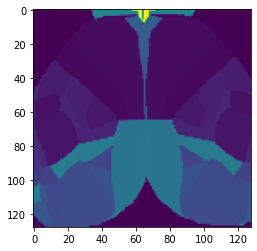

In [8]:
data= np.load('/home/cat/maskwarp.npy')
import matplotlib.pyplot as plt

plt.imshow(data)
plt.show()

In [51]:
# MAKE ORDERED .NZP FILES
fname_list = '/media/cat/4TBSSD/yuki/time_courses/AQ2_ordered.txt'
fnames = np.loadtxt(fname_list,dtype='str')
#print (fnames)

data_list = []
fnames_data_list = []
data_random_list = []
fnames_data_random_list = []
for fname in fnames:
    if '04' in fname:
        data_list.append(np.load(fname))
        fnames_data_list.append(fname)
    else:
        data_random_list.append(np.load(fname))
        fnames_data_random_list.append(fname)

np.savez(fname_list[:-4]+'.npz',
        data_04_lever_pull = data_list,
        data_04_lever_pull_fnames = fnames_data_list,
        data_random = data_random_list,
        data_random_fnames = fnames_data_random_list)


/home/cat/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [44]:
import matplotlib
#matplotlib.use('Agg')
%matplotlib tk
%autosave 180
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import os

Autosaving every 180 seconds


In [54]:
all_files = [
'/media/cat/4TBSSD/yuki/time_courses/AR4_ordered.npz',
'/media/cat/4TBSSD/yuki/time_courses/IA1_ordered.npz',
'/media/cat/4TBSSD/yuki/time_courses/IA2_ordered.npz',
'/media/cat/4TBSSD/yuki/time_courses/IA3_ordered.npz',
'/media/cat/4TBSSD/yuki/time_courses/IJ1_ordered.npz',
'/media/cat/4TBSSD/yuki/time_courses/IJ2_ordered.npz',
'/media/cat/4TBSSD/yuki/time_courses/AQ2_ordered.npz'
]

tot = 0
for ctr, file_ in enumerate(all_files):
    temp = np.load(file_, allow_pickle=True)
    #fnames = temp['data_04_lever_pull_fnames']
    #print (fnames)
    data = temp['data_04_lever_pull']
    print (file_, " # of sessions: ", len(data))
    tot+=len(data)
    ax=plt.subplot(2,4,ctr+1)
    plt.title(os.path.split(file_)[1])
    
    lengths = []
    for k in range(len(data)):
        lengths.append(len(data[k]))
        #print (data[k].shape)
    y = np.histogram(lengths, np.arange(0,400,10))
    plt.plot(y[1][:-1],y[0])
    plt.ylabel("# of sessions")
    plt.xlabel("# of trials in sessions")
    plt.xlim(0,200)
print ("total: ", tot)

/media/cat/4TBSSD/yuki/time_courses/AR4_ordered.npz  # of sessions:  25
/media/cat/4TBSSD/yuki/time_courses/IA1_ordered.npz  # of sessions:  65
/media/cat/4TBSSD/yuki/time_courses/IA2_ordered.npz  # of sessions:  40
/media/cat/4TBSSD/yuki/time_courses/IA3_ordered.npz  # of sessions:  41
/media/cat/4TBSSD/yuki/time_courses/IJ1_ordered.npz  # of sessions:  26
/media/cat/4TBSSD/yuki/time_courses/IJ2_ordered.npz  # of sessions:  39
/media/cat/4TBSSD/yuki/time_courses/AQ2_ordered.npz  # of sessions:  94
total:  330
